# 1. Load Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

2024-11-06 19:14:53.184901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Load datasest 

In [3]:
path = R'/Users/shaquillelee/Documents/Specialization /Datasets'

In [6]:
weather_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_cleaned.csv'), index_col = 0)
pleasant_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'pleasant_cleaned.csv'), index_col = 0)

In [7]:
weather_df.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [8]:
weather_df.shape

(22950, 135)

In [9]:
pleasant_df.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [10]:
pleasant_df.shape

(22950, 15)

# 3. Data Wrangling 

### 3.1 Orginal weather data 

In [11]:
# Copying data and month from original data set 
# Import orginal data set 
original_weatherdf = pd.read_csv(os.path.join(path, 'Original Data', 'weather_dataset.csv'), index_col = 0)

In [12]:
original_weatherdf.reset_index(inplace=True)
original_weatherdf.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [13]:
# Extract 'date' and 'month' columns from original data
date_month_data = original_weatherdf[['DATE', 'MONTH']]

In [14]:
# Ensure indices align if necessary; otherwise, join on a specific key if available
current_data = weather_df.reset_index(drop=True)
current_data = pd.concat([weather_df, date_month_data], axis=1)


In [15]:
current_data.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_humidity  \
0            10.9                     1  ...               0.88   
1            10.1                     6  ...               0.91   
2             9.9                     6  ...               0.91   
3            10.6                     8  ...               0.86   
4             6.0                     8  ...               0.80   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0             1.0003                       0.45                    0.34   
1             1.0007                       0.25                    0.84   
2             1.0096                       0.17                    0.08   
3             1.0184                       0.13                    0.98   
4             1.0328                       0.46                    0.00   

   VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
0                4.7                 8.5                6.0   
1                0.7                 8.9                5.6   
2                0.1                10.5                8.1   
3                0.0                 7.4                7.3   
4                5.7                 5.7                3.0   

   VALENTIA_temp_max      DATE  MONTH  
0               10.9  19600101      1  
1               12.1  19600102      1  
2               12.9  19600103      1  
3               10.6  19600104      1  
4                8.4  19600105      1  

[5 rows x 137 columns]

In [16]:
# Select the last two columns
last_two_columns = current_data.columns[-2:]
# Select the remaining columns (excluding the last two)
remaining_columns = current_data.columns[:-2]
# Reorder the DataFrame with the last two columns at the front
df_weather = current_data[list(last_two_columns) + list(remaining_columns)]

In [17]:
df_weather.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [18]:
df_weather.shape

(22950, 137)

### 3.2 Pleasant Data 

In [19]:
# Copying data and month from original data set 
# Import orginal pleasant data set 
original_pleasantdf = pd.read_csv(os.path.join(path, 'Original Data', 'Weather Prediction Answers.csv'), index_col = 0)

In [20]:
original_pleasantdf.reset_index(inplace=True)
original_pleasantdf.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [21]:
# Extract 'date' column from original data
date_data = original_pleasantdf[['DATE']]

In [22]:
# Ensure indices align if necessary; otherwise, join on a specific key if available
current_data1 = pleasant_df.reset_index(drop=True)
current_data1 = pd.concat([pleasant_df, date_data], axis=1)


In [23]:
current_data1.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather      DATE  
0                          0  19600101  
1                          0  19600102  
2                          0  19600103  
3                          0  19600104  
4                          0  19600105

In [24]:
# Select the last two columns
last_column = current_data1.columns[-1:]
# Select the remaining columns (excluding the last two)
remaining_column = current_data1.columns[:-1]
# Reorder the DataFrame with the last two columns at the front
df_pleasant = current_data1[list(last_column) + list(remaining_column)]

In [25]:
df_pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

### 3.3. Reduce Data to one decade 

In [26]:
# Reduce observations dataset to 90's
dfdecade = df_weather[(df_weather['DATE'].astype(str).str[:4] >= '1990') & (df_weather['DATE'].astype(str).str[:4] <= '1999')]
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101      1                  0            0.83          1.0217   
10959  19900102      1                  2            0.84          1.0238   
10960  19900103      1                  8            0.89          1.0231   
10961  19900104      1                  2            0.77          1.0265   
10962  19900105      1                  7            0.81          1.0286   
...         ...    ...                ...             ...             ...   
14605  19991227     12                  7            0.74          0.9953   
14606  19991228     12                  8            0.88          0.9956   
14607  19991229     12                  8            0.84          1.0162   
14608  19991230     12                  7            0.80          1.0276   
14609  19991231     12                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
10958             -2.1            -3.6  ...                -0.3   
10959             -1.8            -3.9  ...                -3.4   
10960             -2.2            -4.2  ...                -2.6   
10961             -0.7            -3.1  ...                 0.5   
10962              0.0            -3.1  ...                 0.8   
...                ...             ...  ...                 ...   
14605              5.0             1.5  ...                 1.6   
14606              2.4             1.0  ...                 1.0   
14607              1.8             1.0  ...                -1.1   
14608              1.1            -0.3  ...                -2.5   
14609              0.7            -0.7  ...                -7.0   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
10958                     3               0.82             1.0068   
10959                     5               0.79             1.0040   
10960                     4               0.90             1.0094   
10961                     6               0.93             1.0112   
10962                     4               0.91             1.0108   
...                     ...                ...                ...   
14605                     7               0.75             0.9954   
14606                     3               0.73             1.0102   
14607                     5               0.81             1.0229   
14608                     8               0.94             1.0171   
14609                     6               0.94             1.0172   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
10958                       0.20                    0.51                2.0   
10959                       0.21                    1.48                0.1   
10960                       0.38                    0.00                4.9   
10961                       0.13                    0.92                0.0   
10962                       0.20                    0.56                1.2   
...                          ...                     ...                ...   
14605                       0.15                    0.41  

In [27]:
# Reduce pleasant observations dataset to 90's
pleasantdecade = df_pleasant[(df_pleasant['DATE'].astype(str).str[:4] >= '1990') & (df_pleasant['DATE'].astype(str).str[:4] <= '1999')]
pleasantdecade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   
...         ...                     ...                        ...   
14605  19991227                       0                          0   
14606  19991228                       0                          0   
14607  19991229                       0                          0   
14608  19991230                       0                          0   
14609  19991231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0    

In [28]:
# Now we can drop the Date and month column for each dataset 
dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [29]:
pleasantdecade.drop(['DATE'], axis=1, inplace=True)

In [30]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasantdecade.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [31]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [32]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [33]:
y_1.shape

(3652,)

In [34]:
# Create X matrix
X_1 = dfdecade.to_numpy()

In [35]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


# 4. Run Random Forest Model 

In [36]:
stations = {
    0: 'BASEL',
    1: 'BELGRADE',
    2: 'BUDAPEST',
    3: 'DEBILT',
    4: 'DUSSELDORF',
    5: 'HEATHROW',
    6: 'KASSEL',
    7: 'LJUBLJANA',
    8: 'MAASTRICHT',
    9: 'MADRID',
   10: 'MUNCHENB',
   11: 'OSLO',
   12: 'SONNBLICK',
   13: 'STOCKHOLM',
   14: 'VALENTIA',
}

In [37]:
#Reshaping and modelling 
X = dfdecade
y = pleasantdecade
print(X.shape)
print(y.shape)

(3652, 135)
(3652, 15)


In [38]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1,test_size=0.2)

In [39]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921,)
(731, 135) (731,)


### 4.1. Create Random forest


In [40]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [41]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.960328317373461


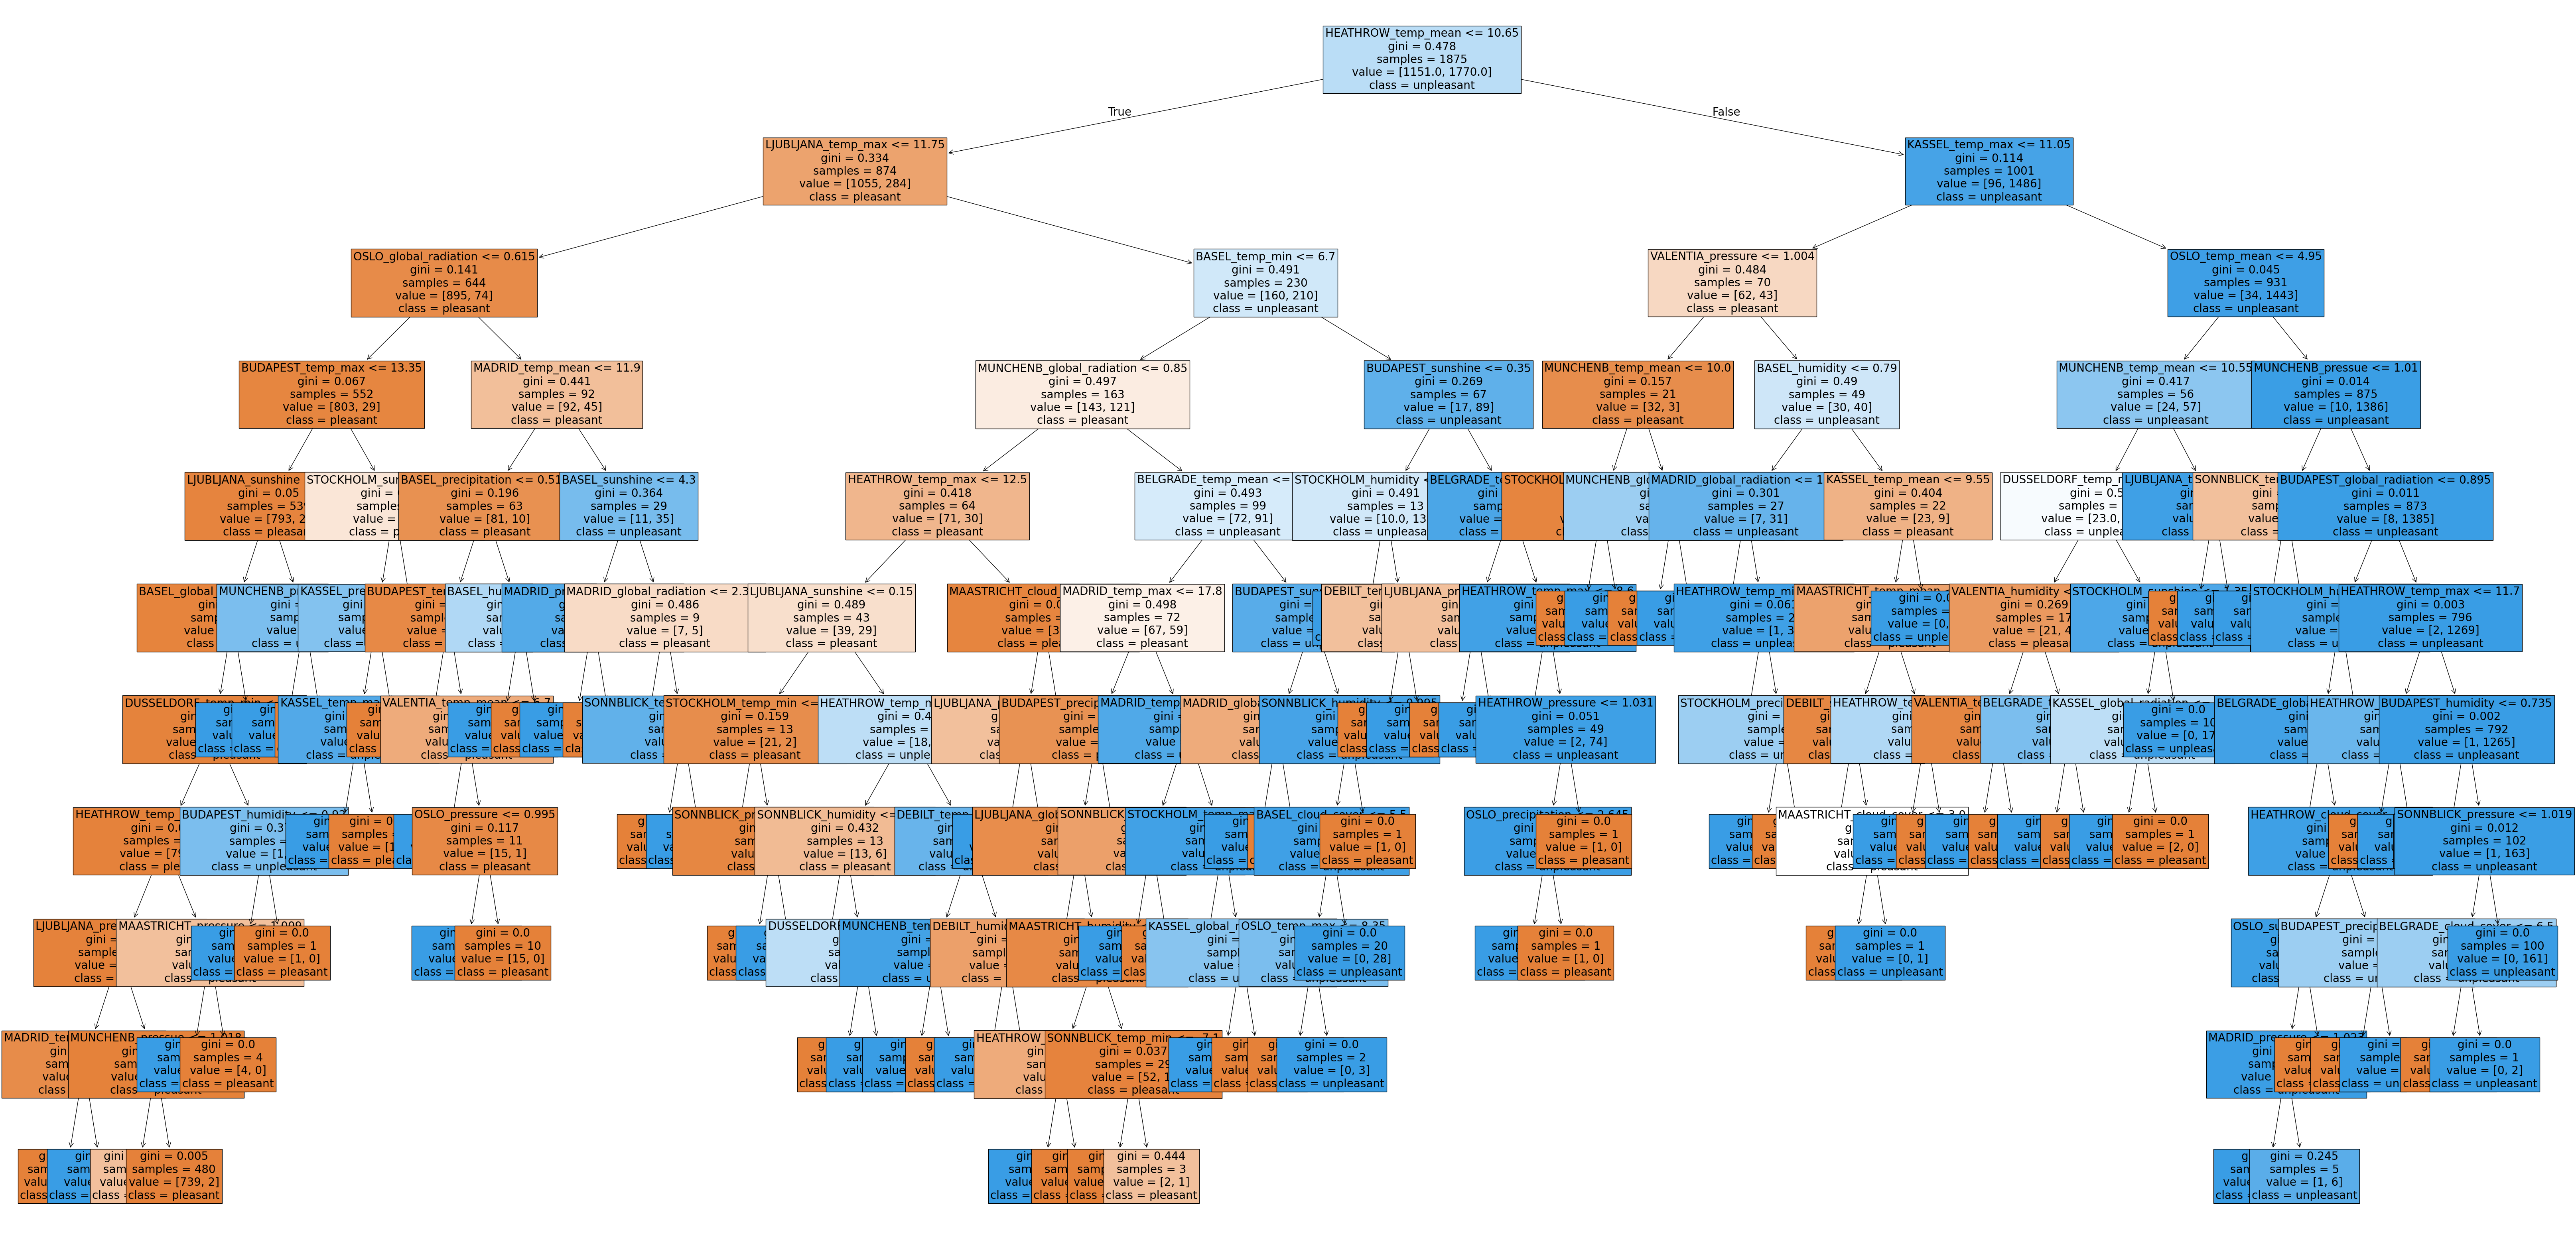

In [42]:
# Plot random forest (90's)
fig1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[20], fontsize = 20, feature_names = dfdecade.columns, class_names=['pleasant', "unpleasant"], filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

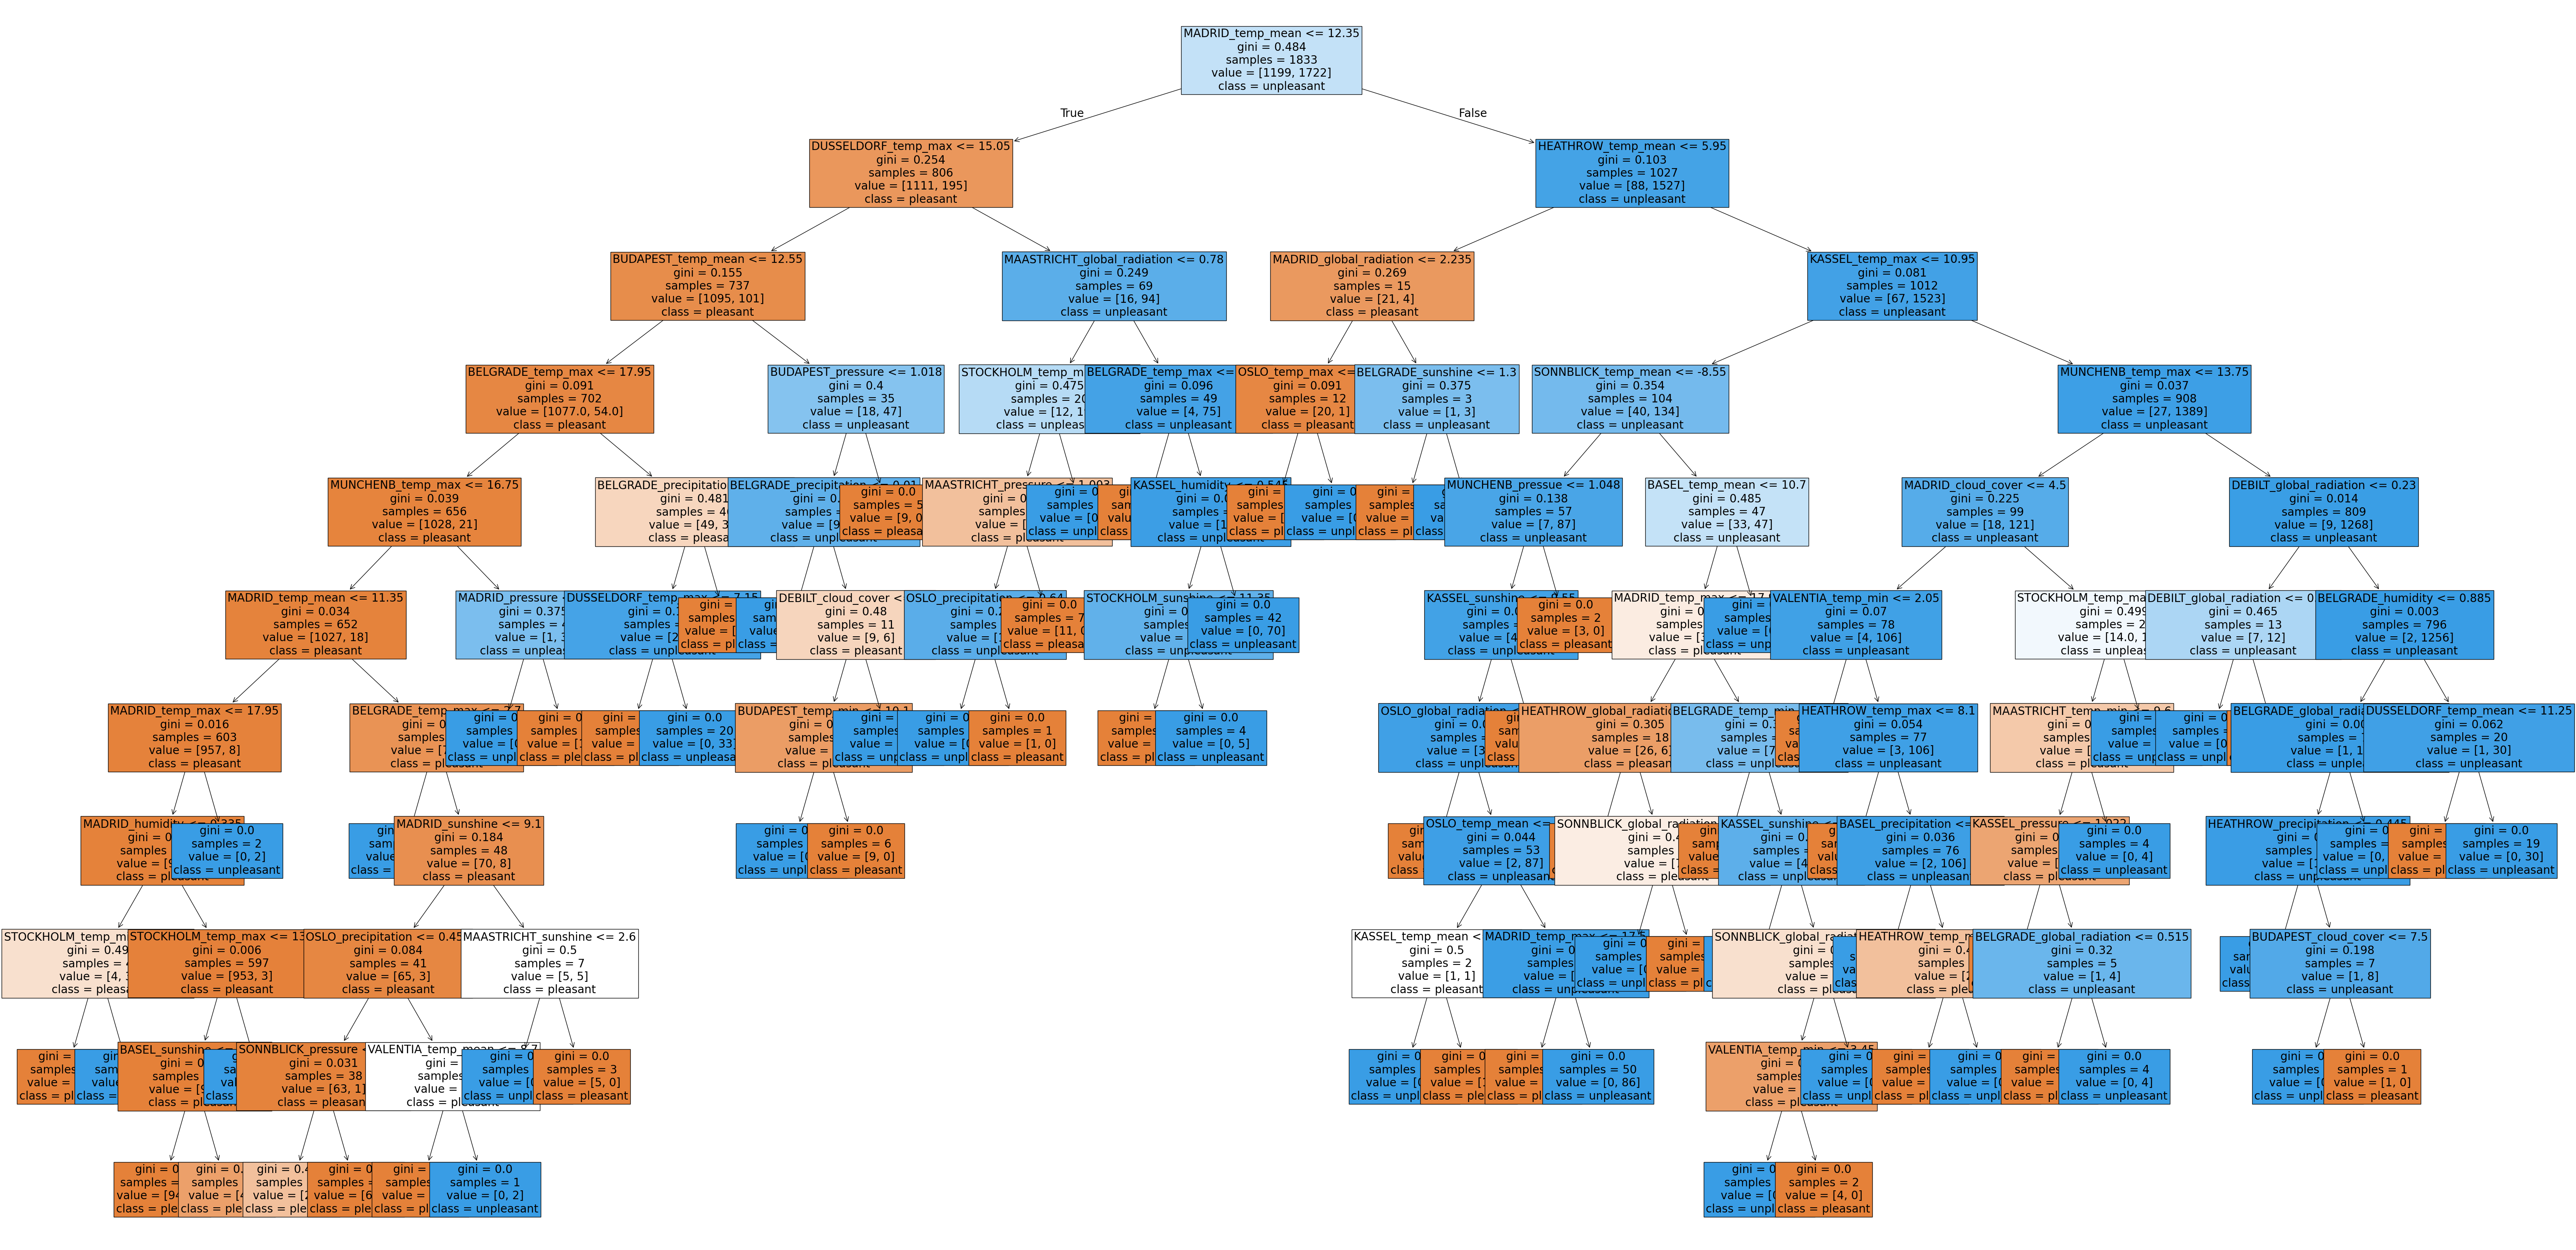

In [43]:
fig1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, feature_names = dfdecade.columns, class_names=['pleasant', "unpleasant"], filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [44]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00030957, 0.00141968, 0.00173231, 0.0027987 , 0.00129797,
       0.00123223, 0.01344371, 0.00972908, 0.0143208 , 0.00140354,
       0.00303624, 0.00151572, 0.00600288, 0.0020184 , 0.00254481,
       0.01876157, 0.00844418, 0.01860419, 0.00057157, 0.0010947 ,
       0.00114363, 0.00581802, 0.00127718, 0.00169419, 0.03638736,
       0.00950781, 0.04412973, 0.00060807, 0.00097909, 0.001235  ,
       0.00170046, 0.00109013, 0.00098307, 0.00255648, 0.00095443,
       0.01471519, 0.0005373 , 0.00106686, 0.00125607, 0.0022035 ,
       0.00072504, 0.00067235, 0.00828735, 0.00112017, 0.01868128,
       0.00061172, 0.00094522, 0.00127768, 0.00567517, 0.00077862,
       0.00155232, 0.01016828, 0.00147289, 0.01222731, 0.00050525,
       0.00057276, 0.00100608, 0.00280582, 0.00112474, 0.00048085,
       0.02002207, 0.01096964, 0.0433827 , 0.00045818, 0.0019653 ,
       0.00085796, 0.01111206, 0.0012055 , 0.00186148, 0.04334645,
       0.00324065, 0.05719581, 0.00064375, 0.0009283 , 0.00098

In [45]:
#Reshape Array 
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00030957, 0.00141968, 0.00173231, 0.0027987 , 0.00129797,
         0.00123223, 0.01344371, 0.00972908, 0.0143208 ],
        [0.00140354, 0.00303624, 0.00151572, 0.00600288, 0.0020184 ,
         0.00254481, 0.01876157, 0.00844418, 0.01860419],
        [0.00057157, 0.0010947 , 0.00114363, 0.00581802, 0.00127718,
         0.00169419, 0.03638736, 0.00950781, 0.04412973],
        [0.00060807, 0.00097909, 0.001235  , 0.00170046, 0.00109013,
         0.00098307, 0.00255648, 0.00095443, 0.01471519],
        [0.0005373 , 0.00106686, 0.00125607, 0.0022035 , 0.00072504,
         0.00067235, 0.00828735, 0.00112017, 0.01868128],
        [0.00061172, 0.00094522, 0.00127768, 0.00567517, 0.00077862,
         0.00155232, 0.01016828, 0.00147289, 0.01222731],
        [0.00050525, 0.00057276, 0.00100608, 0.00280582, 0.00112474,
         0.00048085, 0.02002207, 0.01096964, 0.0433827 ],
        [0.00045818, 0.0019653 , 0.00085796, 0.01111206, 0.0012055 ,
         0.00186148, 0.04334645, 0.0032406

In [46]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.04628406, 0.06233152, 0.10162418, 0.02482193, 0.03454992,
       0.0347092 , 0.08086991, 0.1212434 , 0.04611502, 0.23927662,
       0.04421727, 0.06536764, 0.01365657, 0.07244161, 0.01249116])

In [47]:
# Convert station dictionary into a list
stations_list = list(stations.values())
print(stations_list)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [48]:
important = pd.Series(sumarray, index = stations_list) #.sort_values(ascending = False)
important

BASEL         0.046284
BELGRADE      0.062332
BUDAPEST      0.101624
DEBILT        0.024822
DUSSELDORF    0.034550
HEATHROW      0.034709
KASSEL        0.080870
LJUBLJANA     0.121243
MAASTRICHT    0.046115
MADRID        0.239277
MUNCHENB      0.044217
OSLO          0.065368
SONNBLICK     0.013657
STOCKHOLM     0.072442
VALENTIA      0.012491
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


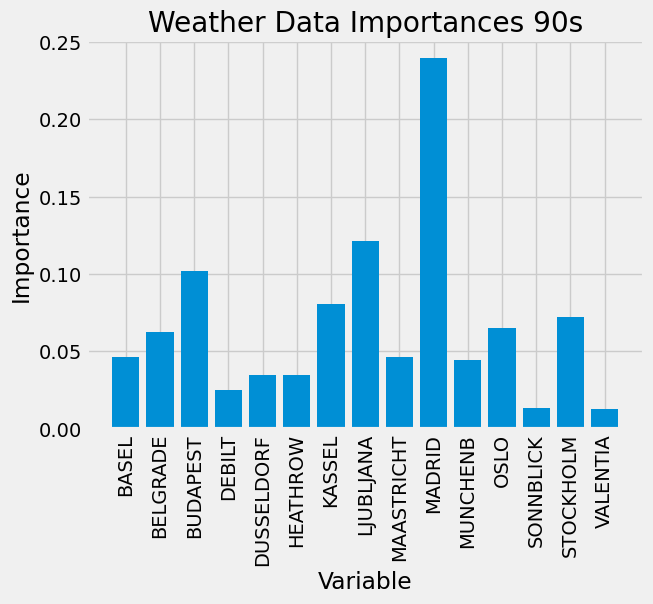

In [49]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations_list)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Weather Data Importances 90s');